## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [190]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [262]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
        index_col="Timestamp",
        parse_dates=True,
        infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [192]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [193]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [194]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [195]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.isnull().sum()
bitstamp_df = bitstamp_df.dropna()
bitstamp_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [196]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:, "Close"]=bitstamp_df.loc[:, "Close"].str.replace("$","",regex=True)

### Step 3: Convert the data type of the Close column to a `float`.

In [197]:
# Convert the Close data type to a float
bitstamp_df.loc[:,"Close"] = bitstamp_df.loc[:, "Close"].astype("float")
# Check data type
bitstamp_df["Close"].dtypes
# check the data became float
bitstamp_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,6928.01,0.209363,1450.735763,6929.289993


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [198]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df = bitstamp_df.drop_duplicates()
bitstamp_df.duplicated().sum()
bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [199]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase_df.isnull().sum()
coinbase_df = coinbase_df.dropna()
coinbase_df.isnull().sum()
coinbase_df.loc[:, "Close"]=coinbase_df.loc[:, "Close"].str.replace("$","",regex=True)
coinbase_df.loc[:,"Close"] = coinbase_df.loc[:, "Close"].astype("float")
coinbase_df.tail()
coinbase_df = coinbase_df.drop_duplicates()
coinbase_df.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [200]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [201]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [202]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [203]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'bitstamp'}, xlabel='Timestamp'>

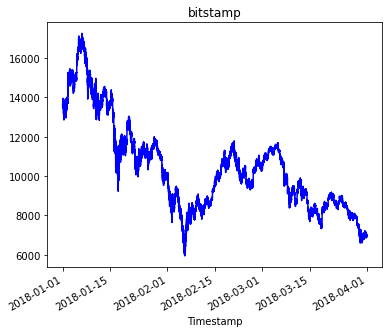

In [204]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(6, 5), title="bitstamp", color="blue")

<AxesSubplot:title={'center':'coinbase'}, xlabel='Timestamp'>

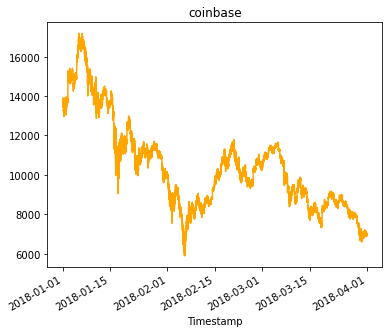

In [205]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(6, 5), title="coinbase", color="Orange")

<AxesSubplot:title={'center':'bitstamp and coinbase Overlay Plot'}, xlabel='Timestamp'>

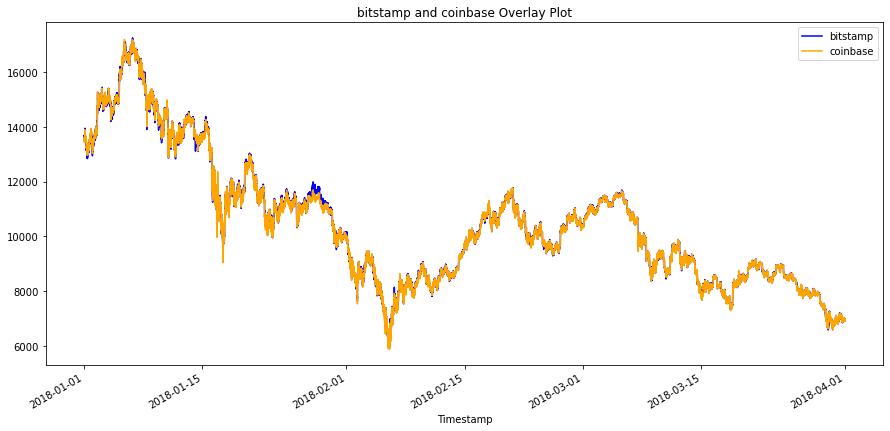

In [206]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15, 7), title="bitstamp and coinbase Overlay Plot", color="blue", label="bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 7), color="orange", label="coinbase")

<AxesSubplot:title={'center':'Jan-2018'}, xlabel='Timestamp'>

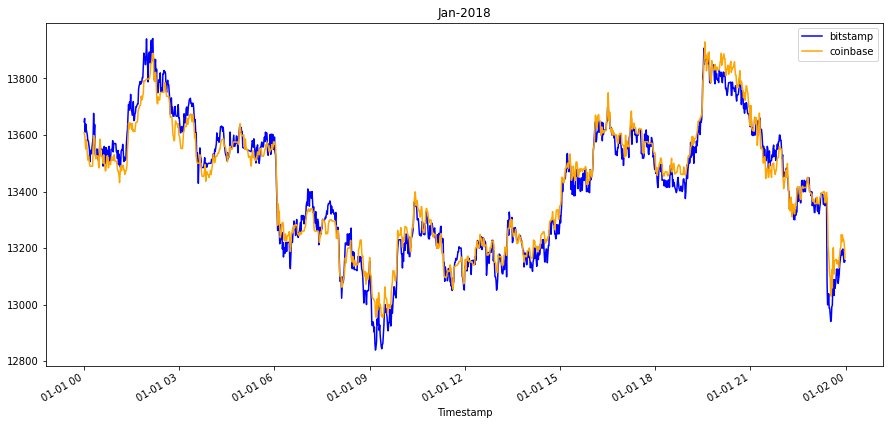

In [207]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01'].plot(legend=True, figsize=(15, 7), title="Jan-2018", color="blue", label="bitstamp")
coinbase_sliced.loc['2018-01-01'].plot(legend=True, figsize=(15, 7), color="orange", label="coinbase")

<AxesSubplot:title={'center':'March-2018'}, xlabel='Timestamp'>

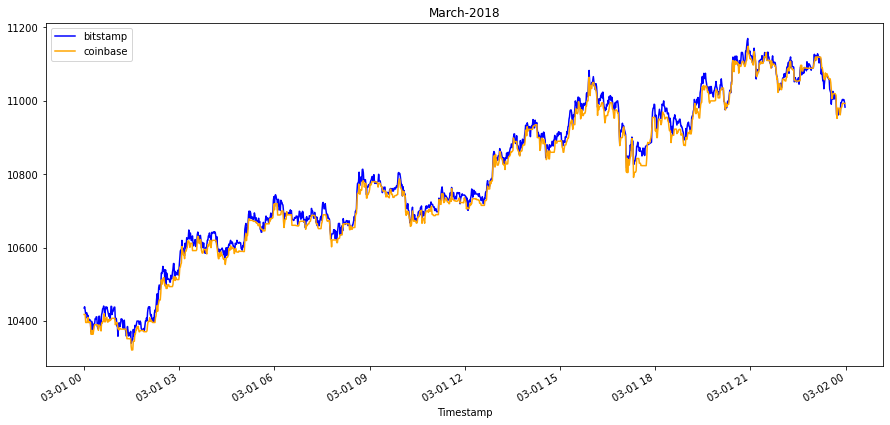

In [208]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01'].plot(legend=True, figsize=(15, 7), title="March-2018", color="blue", label="bitstamp")
coinbase_sliced.loc['2018-03-01'].plot(legend=True, figsize=(15, 7), color="orange", label="coinbase")

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Jan-5-2018'}, xlabel='Timestamp'>

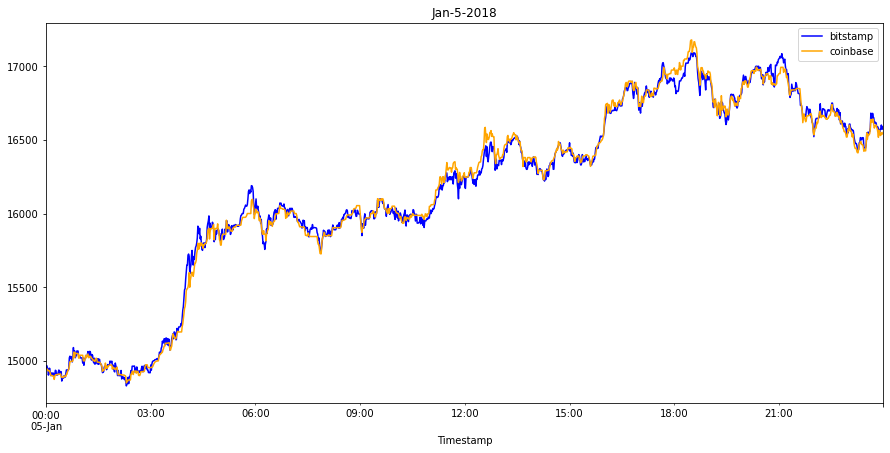

In [209]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-5'].plot(legend=True, figsize=(15, 7), title="Jan-5-2018", color="blue", label="bitstamp")
coinbase_sliced.loc['2018-01-5'].plot(legend=True, figsize=(15, 7), color="orange", label="coinbase")

In [210]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_df['Close'].loc['2018-01-5']-coinbase_df['Close'].loc['2018-01-5']
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       -0.650535
std        44.027768
min      -150.850000
25%       -26.000000
50%         0.055000
75%        24.477500
max       216.930000
Name: Close, dtype: float64

<AxesSubplot:>

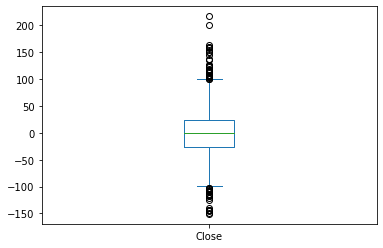

In [211]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'Feb-18-2018'}, xlabel='Timestamp'>

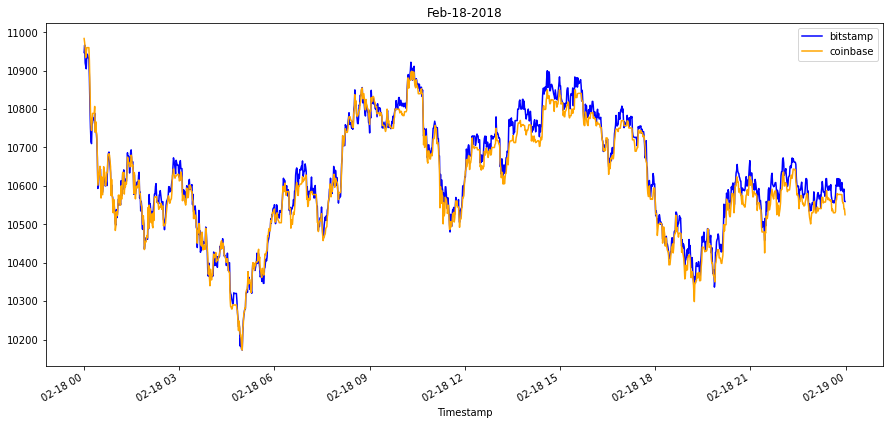

In [212]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-18'].plot(legend=True, figsize=(15, 7), title="Feb-18-2018", color="blue", label="bitstamp")
coinbase_sliced.loc['2018-02-18'].plot(legend=True, figsize=(15, 7), color="orange", label="coinbase")

In [213]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_df['Close'].loc['2018-02-18']-coinbase_df['Close'].loc['2018-02-18']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean       15.861741
std        18.735501
min       -55.590000
25%         3.182500
50%        15.820000
75%        29.277500
max        73.230000
Name: Close, dtype: float64

<AxesSubplot:>

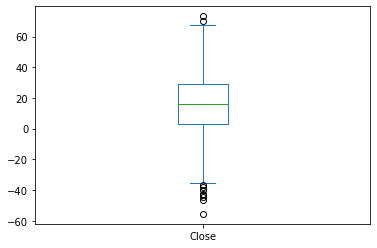

In [214]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':'March-28-2018'}, xlabel='Timestamp'>

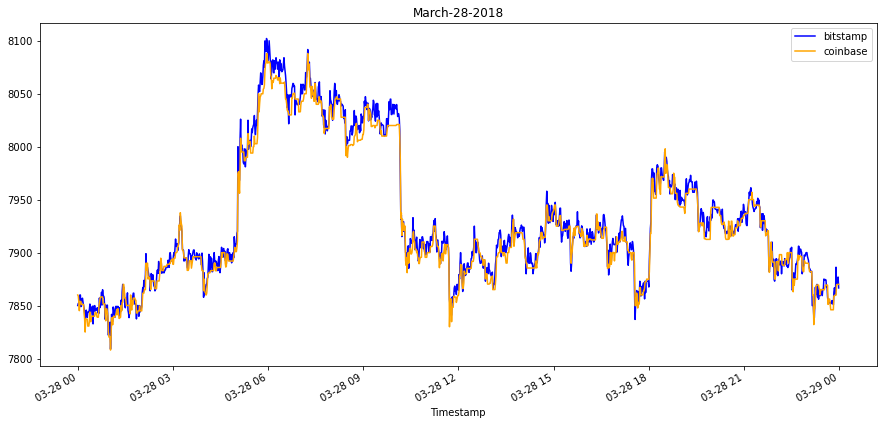

In [215]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-28'].plot(legend=True, figsize=(15, 7), title="March-28-2018", color="blue", label="bitstamp")
coinbase_sliced.loc['2018-03-28'].plot(legend=True, figsize=(15, 7), color="orange", label="coinbase")

In [216]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_df['Close'].loc['2018-03-28']-coinbase_df['Close'].loc['2018-03-28']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:>

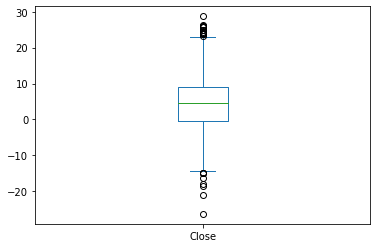

In [217]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [218]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_df['Close'].loc['2018-01-5']-coinbase_df['Close'].loc['2018-01-5']
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > .01]
arbitrage_spread_early.describe()

count    721.000000
mean      32.153454
std       29.851004
min        0.010000
25%       12.220000
50%       24.470000
75%       41.260000
max      216.930000
Name: Close, dtype: float64

In [219]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp_df['Close'].loc['2018-02-18']-coinbase_df['Close'].loc['2018-02-18']
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > .01]
arbitrage_spread_middle.describe()

count    1152.000000
mean       22.449896
std        13.987412
min         0.070000
25%        11.175000
50%        21.045000
75%        31.725000
max        73.230000
Name: Close, dtype: float64

In [220]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp_df['Close'].loc['2018-03-28']-coinbase_df['Close'].loc['2018-03-28']
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > .01]
arbitrage_spread_late.describe()

count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [221]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_df["Close"].loc["2018-01-5"]

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-05 00:00:00    0.000401
2018-01-05 00:01:00    0.001613
2018-01-05 00:02:00    0.000470
2018-01-05 00:03:00    0.001076
2018-01-05 00:04:00         NaN
Name: Close, dtype: float64

In [222]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_df["Close"].loc["2018-02-18"]

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-02-18 00:00:00   NaN
2018-02-18 00:01:00   NaN
2018-02-18 00:02:00   NaN
2018-02-18 00:03:00   NaN
2018-02-18 00:04:00   NaN
Name: Close, dtype: float64

In [223]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_df["Close"].loc["2018-03-28"]

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001120
2018-03-28 00:04:00    0.000777
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [224]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-05 04:02:00    0.010415
2018-01-05 04:03:00    0.010224
2018-01-05 04:04:00    0.013802
2018-01-05 04:05:00    0.012719
Name: Close, dtype: float64

In [225]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle= spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [226]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late= spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [227]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early = spread_return_early[spread_return_early < .01]
profitable_trades_early.describe()

count    7.170000e+02
mean     1.945970e-03
std      1.709005e-03
min      6.281407e-07
25%      7.501751e-04
50%      1.494635e-03
75%      2.544024e-03
max      9.920596e-03
Name: Close, dtype: float64

In [228]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle = spread_return_middle[spread_return_middle < .01]
profitable_trades_middle.describe()

count    1152.000000
mean        0.002109
std         0.001308
min         0.000007
25%         0.001056
50%         0.001962
75%         0.003006
max         0.006781
Name: Close, dtype: float64

In [229]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late = spread_return_late[spread_return_late < .01]
profitable_trades_late.describe()

count    1028.000000
mean        0.000987
std         0.000690
min         0.000001
25%         0.000469
50%         0.000866
75%         0.001343
max         0.003547
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [230]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_df['Close'].loc['2018-01-5']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_early.head()

Timestamp
2018-01-05 00:00:00     6.00
2018-01-05 00:01:00    24.15
2018-01-05 00:02:00     7.02
2018-01-05 00:03:00    16.09
2018-01-05 00:04:00      NaN
Name: Close, dtype: float64

In [231]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_df['Close'].loc['2018-01-5']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_middle.head()

Timestamp
2018-01-05 00:00:00   NaN
2018-01-05 00:01:00   NaN
2018-01-05 00:02:00   NaN
2018-01-05 00:03:00   NaN
2018-01-05 00:04:00   NaN
Name: Close, dtype: float64

In [232]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late= profitable_trades_late * bitstamp_df['Close'].loc['2018-01-5']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_late.head()

Timestamp
2018-01-05 00:00:00   NaN
2018-01-05 00:01:00   NaN
2018-01-05 00:02:00   NaN
2018-01-05 00:03:00   NaN
2018-01-05 00:04:00   NaN
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [234]:
# Generate the summary statistics for the early profit per trade DataFrame

profit_per_trade_early = profit_early.dropna()
profit_per_trade_early.describe()

count    717.000000
mean      31.300851
std       27.596396
min        0.010000
25%       12.200000
50%       24.260000
75%       41.000000
max      160.320000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

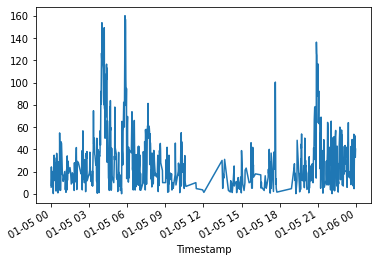

In [235]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()

In [236]:
# Generate the summary statistics for the middle profit per trade DataFrame

profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

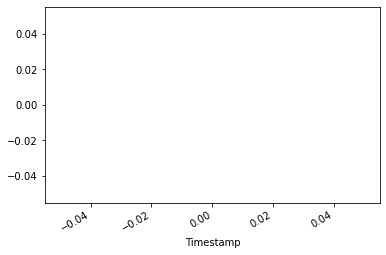

In [237]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot()

In [245]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

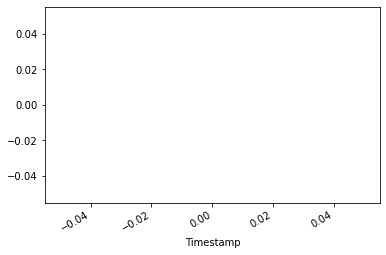

In [246]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [255]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum = profit_per_trade_early.sum()
profit_sum

22442.71000000003

In [256]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum = profit_per_trade_middle.sum()
profit_sum

0.0

In [249]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum = profit_per_trade_late.sum()
profit_sum

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [252]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Early Profits'}, xlabel='Timestamp'>

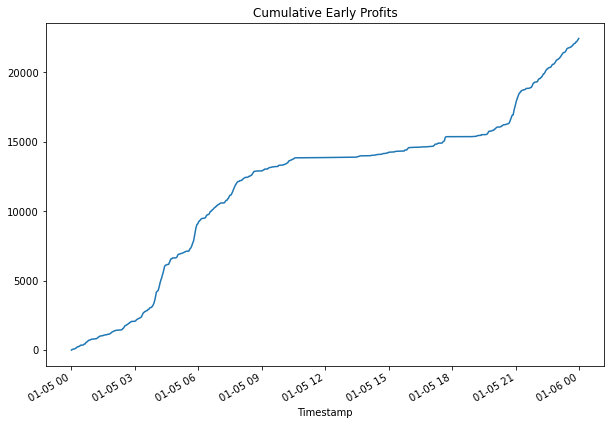

In [257]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Early Profits")

In [258]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Middle Profits'}, xlabel='Timestamp'>

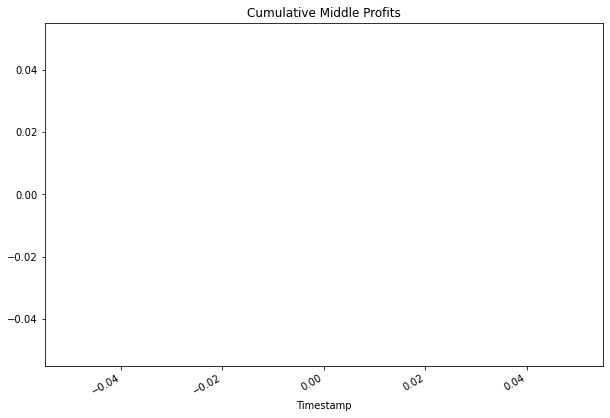

In [259]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Middle Profits")

In [260]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative late Profits'}, xlabel='Timestamp'>

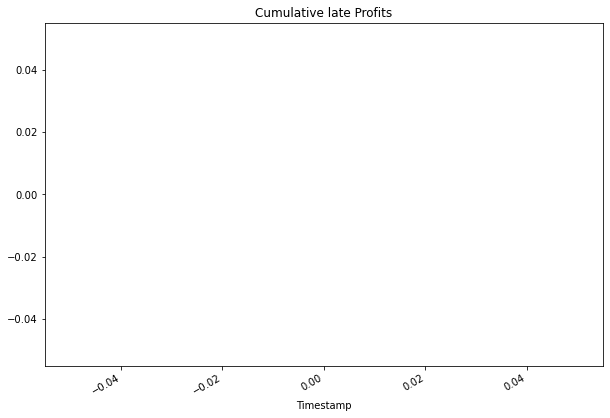

In [261]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative late Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE

In [ ]:
Yes, after reviewing the profit information across each date from the different time periods, i can clearly identify Cumulative Early Profits data.
From the plot, we can see that profits accumulated at a consistent pace in the early morning, started to level off in the evening, and then topped out once the trades ceased to be profitable.